# Getting Started

In [2]:
%pip install ribs

Note: you may need to restart the kernel to use updated packages.


After installing ribs, start by importing it:

In [2]:
import ribs

In [3]:
from ribs.archives import GridArchive
from ribs.emitters import GaussianEmitter
from ribs.optimizers import Optimizer

archive = GridArchive([64, 64], [(-1,1), (-1,1)])
emitters = [GaussianEmitter(archive, [0.0] * 10, 1)]
optimizer = Optimizer(archive, emitters)

## Visualization

`ribs.visualize` is only available with the full version of ribs, which can be installed with:

In [ ]:
%pip install ribs[all]

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

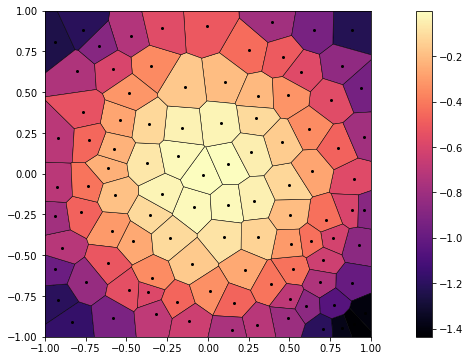

In [1]:
import numpy as np
from ribs.archives import CVTArchive
from ribs.visualize import cvt_archive_heatmap

seed = 42
np.random.seed(seed)  # Make scipy's k-means deterministic.
archive = CVTArchive([(-1, 1), (-1, 1)],
                     100,
                     samples=1000,
                     use_kd_tree=False,
                     k_means_threshold=1e-6,
                     seed=seed)
archive.initialize(solution_dim=2)

# Add solutions.
n_vals = 100_000
for _ in range(n_vals):
    solution = np.random.uniform(-1, 1, 2)
    archive.add(
        solution=solution,
        # Objective is the negative sphere function.
        objective_value=-np.sum(np.square(solution)),
        behavior_values=solution,
    )
    
cvt_archive_heatmap(archive)

## Saving and Restoring Intermediate States

ribs optimizers are pickle-able, and as such, they may be saved and reloaded
like other Python objects. As the optimizer contains the archive and emitters,
we only need to save the optimizer as follows:

In [4]:
import pickle

with open("optimizer.pkl", "wb") as file:
    pickle.dump(optimizer, file)

And to load the optimizer:

In [5]:
with open("optimizer.pkl", "rb") as file:
    optimizer = pickle.load(file)